## Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

[Netflix](https://en.wikipedia.org/wiki/Netflix)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-shows


In [ ]:
netflix_data=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### **We see some missing values located on cast, country and date added features. And also rating feature includes 4, duration feature includes 3 missing values** ####

In [ ]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_movies=netflix_data[netflix_data['type']=='Movie']

## EDA

<ipython-input-10-21c3beb99fcb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="type", data=netflix_data, palette="Set2")


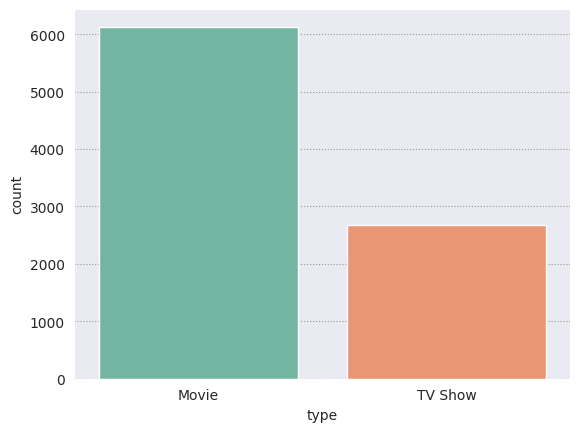

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")

### RATINGS

<ipython-input-11-9a1a2825cff0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])


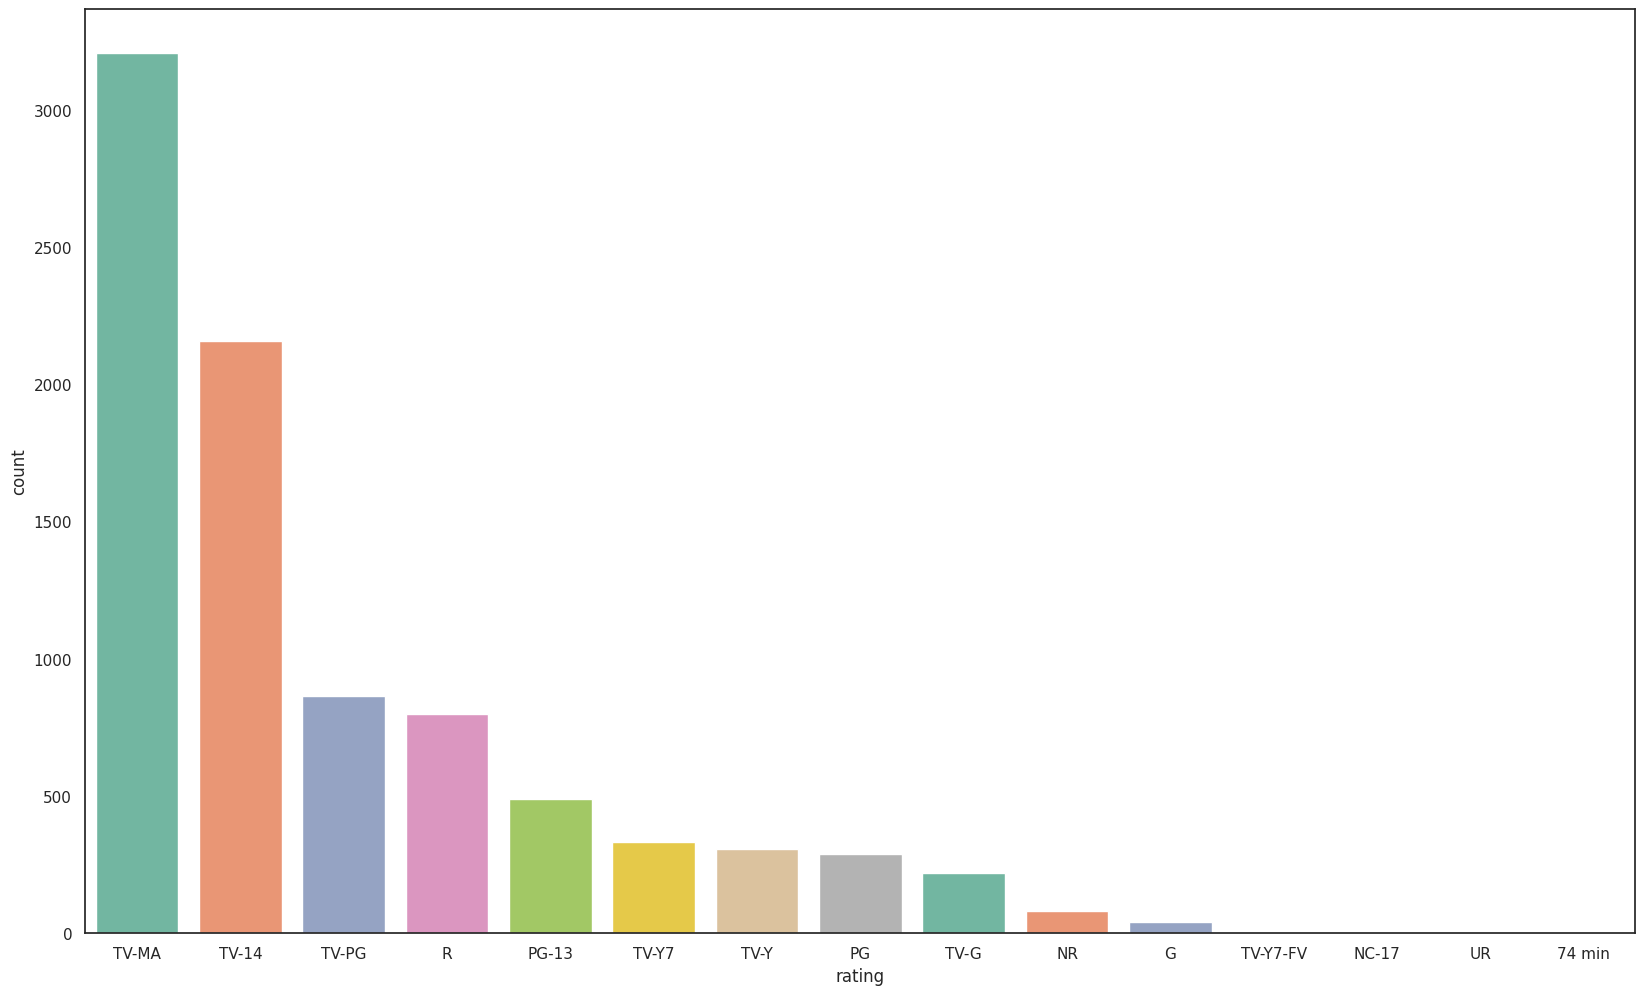

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="white")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

### By this countplot of ratings we can realize that TV-MA ( Mature Audiences ) contents have the highest rating numbers. Then it gets lower as in order TV-14 ( Material that parents or adult guardians may find unsuitable for children under the age of 14 ) and TV-PG ( Parental Guideness ).

### YEAR

<ipython-input-12-9fadaccce67e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="release_year", data=netflix_data, palette="bright", order=netflix_data['release_year'].value_counts().index[0:15])


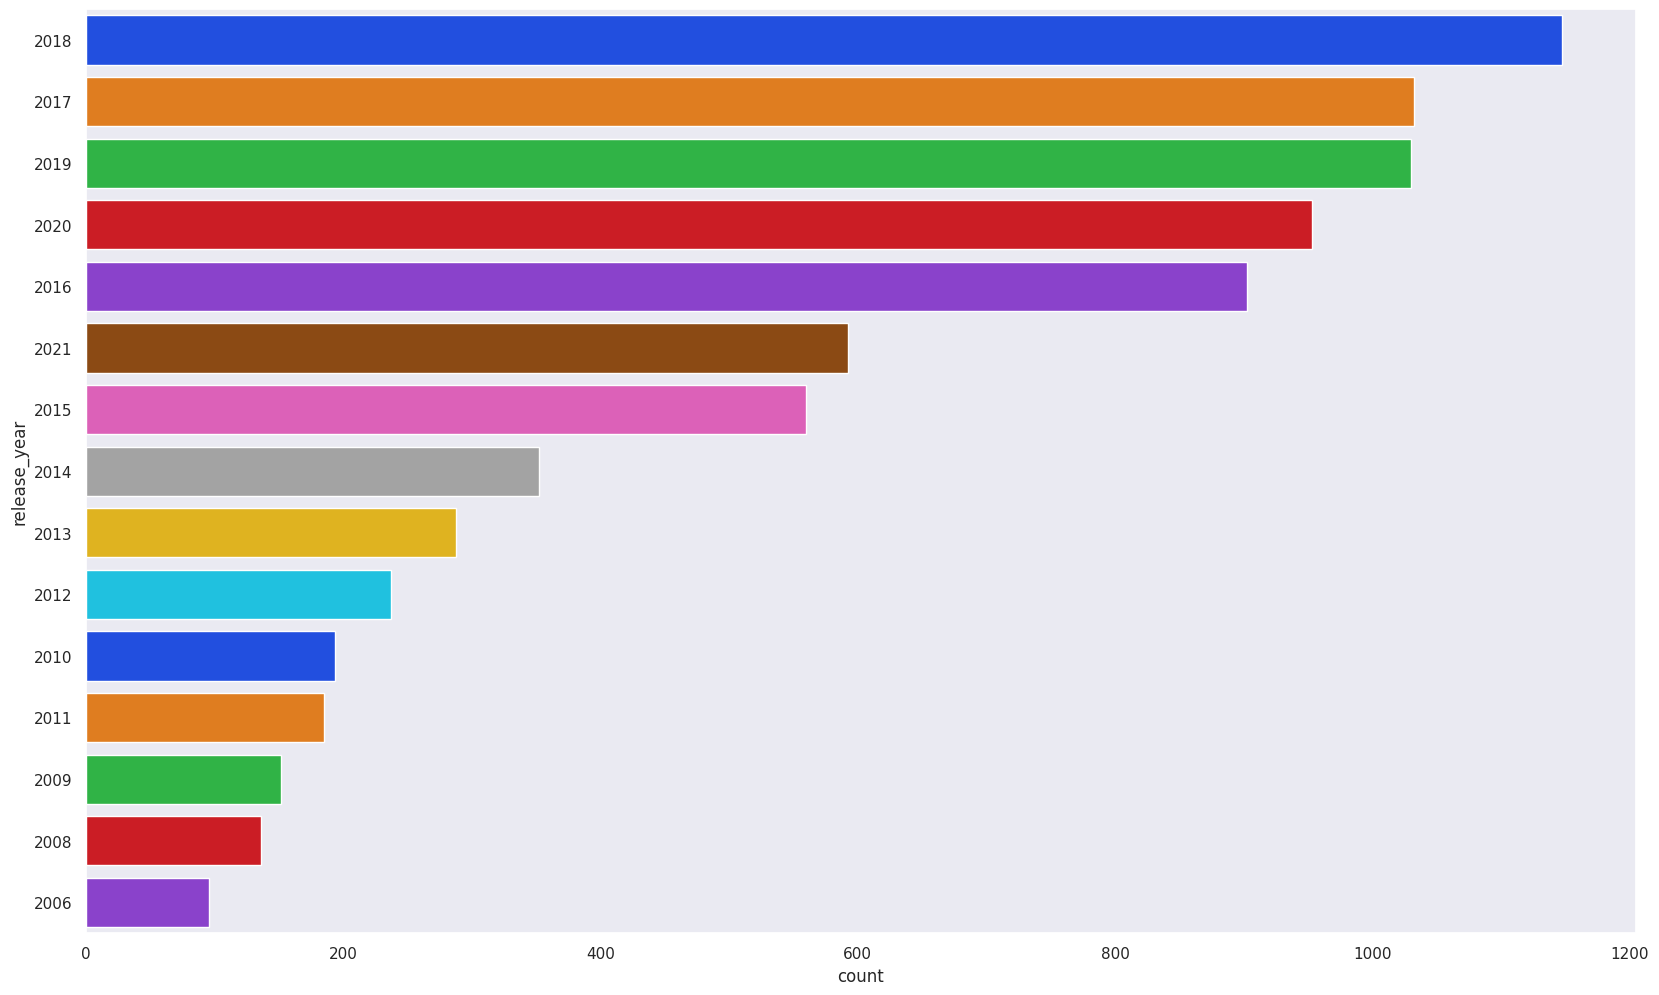

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=netflix_data, palette="bright", order=netflix_data['release_year'].value_counts().index[0:15])

### This plot shows that most of the contents were produced in 2018 and 2017. Interesting fact is in 2019, 2020 and 2021 the number of produced contents are low. This is mostly because Covid-19 pandemic

### RECOMMENDATION SYSTEM

![download.png](attachment:5c885902-f8cc-4b51-92b5-6dc45eb54e7f.png)

![1_mz9tzP1LjPBhmiWXeHyQkQ.png](attachment:2f767620-17c0-46f9-a728-eb7cdf5ab56a.png)

### The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

[Recommendation Systems Source - 1](https://towardsdatascience.com/recommendation-systems-explained-a42fc60591ed)
[Recommendation Systems Source - 2](https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])
tfidf_matrix.shape

(8807, 18895)

### The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

![download.png](attachment:198e93ff-1d14-47be-9b06-ba7332ed08a4.png)

### Cosine similarity is a measure of similarity, often used to measure document similarity in text analysis.

[Cosine Similarity Source-1](https://www.geeksforgeeks.org/how-to-calculate-cosine-similarity-in-python/)
[Cosine Similarity Source-2](https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

#### Defining Recommendation System Function

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

### At this point our recommendation system function is ready to use. After defining our recommendation system function we can use it to get recommendations. All we need to do is passing the content name as an argument

### I am a huge Peaky Blinders fan. But you can check any content as an argument in your recommendation function

![AAAABe1BG2UPFboUCtdFm1bZkdN1k8eyAeEK5tVKLXXSSBeLLlUFiWWTUUZGxXHZZjaB6hs9xZU18mq7JNOr0cGao5oqKhARxA0sGdR07xQxgyItY4JFWB7ryw7DsqhDZQ.jpg](attachment:c0b1fa02-b957-44e3-a9aa-6a1f14c254d5.jpg)

In [ ]:
get_recommendations('Peaky Blinders')

,title
7683,Our Godfather
2646,My Stupid Boss
3133,Don
8293,The Fear
7140,Jonathan Strange & Mr Norrell
7785,Power Rangers Zeo
8467,The Prison
8539,The Tudors
1510,The Con Is On
8391,The Legend of Michael Mishra


In [ ]:
get_recommendations('Dark')

,title
2874,Altered Carbon
4629,Maniac
1034,Synchronic
626,Sophie: A Murder in West Cork
1117,Ibrahim a Fate to Define
4101,Candyflip
4253,Black Mirror: Bandersnatch
869,Who Killed Sara?
2979,THE STRANGER
7348,Love Rain


## Content based filtering on multiple metrics ##

* **Title**
* **Cast**
* **Director**
* **Listed in**
* **Plot**

**Transforming NULLs to empty strings**

In [ ]:
missingfilled=netflix_data.fillna('')
missingfilled.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


**Data cleaning. Converting all words to their lower case form**

In [ ]:
def data_cleaning(x):
        return str.lower(x.replace(" ", ""))

**Selecting features which are going to filter model**

In [ ]:
features=['title','director','cast','listed_in','description']
missingfilled=missingfilled[features]

In [ ]:
for feature in features:
    missingfilled[feature] = missingfilled[feature].apply(data_cleaning)

missingfilled.head(2)

<ipython-input-23-26dfe6e719b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missingfilled[feature] = missingfilled[feature].apply(data_cleaning)


,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [ ]:
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
missingfilled['soup'] = missingfilled.apply(content_include, axis=1)

**Now the code is basically similar to the upper model except the fact that count vectorizer is used instead of tf-idf**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
countvec = CountVectorizer(stop_words='english')
countvec_matrix = countvec.fit_transform(missingfilled['soup'])

cosine_sim2 = cosine_similarity(countvec_matrix, countvec_matrix)

In [ ]:
missingfilled=missingfilled.reset_index()
indices = pd.Series(missingfilled.index, index=missingfilled['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('Dark', cosine_sim2)

,title
260,The Defeated
3604,Sintonia
2053,Young Wallander
3744,Unit 42
5404,The Truth Seekers
6323,Black Heart
3789,Killer Ratings
4476,Terrorism Close Calls
4673,Inside the Criminal Mind
3855,The Writer


In [ ]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

,title
3034,Giri / Haji
5032,The Frankenstein Chronicles
8431,The Murder Detectives
4951,Loaded
4809,Kiss Me First
6922,Happy Valley
2184,Get Even
519,I AM A KILLER
3789,Killer Ratings
4476,Terrorism Close Calls


In [ ]:
get_recommendations_new('Black Mirror', cosine_sim2)

,title
3045,Dracula
3551,The Dark Crystal: Age of Resistance
4262,Watership Down
1301,Behind Her Eyes
7017,How to Live Mortgage Free with Sarah Beeny
2979,THE STRANGER
5365,Vexed
69,Stories by Rabindranath Tagore
1056,Ajaibnya Cinta
1603,Alien Worlds
